In [1]:
%pip -q install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import pandas as pd

# Define the folder containing the jsonl files
folder_path = './metrics'

# List all files in the directory
files = [f for f in os.listdir(folder_path) if f.endswith('.jsonl')]

# Initialize an empty list to hold DataFrames
data_frames = []

# Loop through the list of files and read each jsonl file
for file in files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_json(file_path, lines=True)
    data_frames.append(df)

# Concatenate all DataFrames into one
combined_df = pd.concat(data_frames, ignore_index=True)

# Display the combined DataFrame
combined_df.head()


,key,value,_time,_id,_implementation
0,test_insert_duration_ms_100000,39975.0,2024-06-10 20:50:03.490855932,58d1ed49-3442-469e-babe-bc2aa0ba844d,example
1,test_insert_100000,0.0,2024-06-10 20:50:03.490864038,58d1ed49-3442-469e-babe-bc2aa0ba844d,example
2,test_insert_duration_ms_10,27.0,2024-06-10 20:50:03.683422565,58d1ed49-3442-469e-babe-bc2aa0ba844d,example
3,test_insert_10,0.0,2024-06-10 20:50:03.683429956,58d1ed49-3442-469e-babe-bc2aa0ba844d,example
4,test_insert_duration_ms_10,28.0,2024-06-10 20:50:03.782463312,58d1ed49-3442-469e-babe-bc2aa0ba844d,example


In [3]:
mask = combined_df['key'].str.contains('insert_duration')
pd.DataFrame(combined_df[mask].groupby(by=["_id","_implementation","key"])["value"].sum())

value
_id                                  _implementation key                                     
353ebbcb-0164-4bec-80cb-687a8b693da4 example         test_insert_duration_ms_10        2385.0
                                                     test_insert_duration_ms_100       5875.0
                                                     test_insert_duration_ms_1000     40201.0
                                                     test_insert_duration_ms_10000   127443.0
                                                     test_insert_duration_ms_100000   34521.0
58d1ed49-3442-469e-babe-bc2aa0ba844d example         test_insert_duration_ms_10        2651.0
                                                     test_insert_duration_ms_100       6852.0
                                                     test_insert_duration_ms_1000     45499.0
                                                     test_insert_duration_ms_10000   131017.0
                                                     test_insert_duration_ms_100000   39975.0
650f3043-61f5-46d1-b697-94af3c00e39d example         test_insert_duration_ms_10        2742.0
                                                     test_insert_duration_ms_100       6441.0
                                                     test_insert_duration_ms_1000     43092.0
                                                     test_insert_duration_ms_10000   124962.0
                                                     test_insert_duration_ms_100000   43723.0
b459e110-4af6-4404-8757-9a016dfbb4e7 example2        test_insert_duration_ms_10        3723.0
                                                     test_insert_duration_ms_100       6108.0
                                                     test_insert_duration_ms_1000     71120.0
                                                     test_insert_duration_ms_10000   212882.0
                                                     test_insert_duration_ms_100000   38597.0
c77f9c77-029a-476c-994e-2416f768303e normie          test_insert_duration_ms_10      460397.0
                                                     test_insert_duration_ms_100      83685.0
                                                     test_insert_duration_ms_1000     40467.0
                                                     test_insert_duration_ms_10000    32559.0
                                                     test_insert_duration_ms_100000   47201.0
c8484370-6b96-423e-8ca0-31e7ba8247c0 example2        test_insert_duration_ms_10        3040.0
                                                     test_insert_duration_ms_100       5530.0
                                                     test_insert_duration_ms_1000     70222.0
                                                     test_insert_duration_ms_10000   212450.0
                                                     test_insert_duration_ms_100000   33999.0

In [4]:
mask = combined_df['key'].str.contains('insert_duration')
pd.DataFrame(combined_df[mask].groupby(by=["_id","_implementation","key"])["value"].mean())

value
_id                                  _implementation key                                       
353ebbcb-0164-4bec-80cb-687a8b693da4 example         test_insert_duration_ms_10         23.8500
                                                     test_insert_duration_ms_100        58.7500
                                                     test_insert_duration_ms_1000      402.0100
                                                     test_insert_duration_ms_10000   12744.3000
                                                     test_insert_duration_ms_100000  34521.0000
58d1ed49-3442-469e-babe-bc2aa0ba844d example         test_insert_duration_ms_10         26.5100
                                                     test_insert_duration_ms_100        68.5200
                                                     test_insert_duration_ms_1000      454.9900
                                                     test_insert_duration_ms_10000   13101.7000
                                                     test_insert_duration_ms_100000  39975.0000
650f3043-61f5-46d1-b697-94af3c00e39d example         test_insert_duration_ms_10         27.4200
                                                     test_insert_duration_ms_100        64.4100
                                                     test_insert_duration_ms_1000      430.9200
                                                     test_insert_duration_ms_10000   12496.2000
                                                     test_insert_duration_ms_100000  43723.0000
b459e110-4af6-4404-8757-9a016dfbb4e7 example2        test_insert_duration_ms_10         37.2300
                                                     test_insert_duration_ms_100        61.0800
                                                     test_insert_duration_ms_1000      711.2000
                                                     test_insert_duration_ms_10000   21288.2000
                                                     test_insert_duration_ms_100000  38597.0000
c77f9c77-029a-476c-994e-2416f768303e normie          test_insert_duration_ms_10         46.0397
                                                     test_insert_duration_ms_100        83.6850
                                                     test_insert_duration_ms_1000      404.6700
                                                     test_insert_duration_ms_10000    3255.9000
                                                     test_insert_duration_ms_100000  47201.0000
c8484370-6b96-423e-8ca0-31e7ba8247c0 example2        test_insert_duration_ms_10         30.4000
                                                     test_insert_duration_ms_100        55.3000
                                                     test_insert_duration_ms_1000      702.2200
                                                     test_insert_duration_ms_10000   21245.0000
                                                     test_insert_duration_ms_100000  33999.0000

In [6]:
import pandas as pd

# Assuming combined_df is already defined and contains the necessary data

# Step 1: Create a mask to filter rows where 'key' contains 'insert_duration'
mask = combined_df['key'].str.contains('insert_duration')

# Step 2: Filter the DataFrame using the mask
filtered_df = combined_df[mask]

# Step 3: Group by '_id', '_implementation', and 'key', then calculate the mean of 'value'
grouped_df = filtered_df.groupby(by=["_id", "_implementation", "key"])["value"].mean().reset_index()

# Step 4: Pivot the DataFrame to make 'key' values as columns
pivot_df = grouped_df.pivot_table(index=['_id', '_implementation'], columns='key', values='value').reset_index()

# Step 5: Flatten the MultiIndex columns
pivot_df.columns.name = None
pivot_df.columns = [f'{col}' if col not in ['_id', '_implementation'] else col for col in pivot_df.columns]

# Display the result
pivot_df


,_id,_implementation,test_insert_duration_ms_10,test_insert_duration_ms_100,test_insert_duration_ms_1000,test_insert_duration_ms_10000,test_insert_duration_ms_100000
0,353ebbcb-0164-4bec-80cb-687a8b693da4,example,23.8500,58.750,402.01,12744.3,34521.0
1,58d1ed49-3442-469e-babe-bc2aa0ba844d,example,26.5100,68.520,454.99,13101.7,39975.0
2,650f3043-61f5-46d1-b697-94af3c00e39d,example,27.4200,64.410,430.92,12496.2,43723.0
3,b459e110-4af6-4404-8757-9a016dfbb4e7,example2,37.2300,61.080,711.20,21288.2,38597.0
4,c77f9c77-029a-476c-994e-2416f768303e,normie,46.0397,83.685,404.67,3255.9,47201.0
5,c8484370-6b96-423e-8ca0-31e7ba8247c0,example2,30.4000,55.300,702.22,21245.0,33999.0


In [39]:
mask = combined_df['key'].str.contains('insert_duration')
df_avg_insert = pd.DataFrame(combined_df[mask].groupby(by=["_id","_implementation","key"])["value"].mean()).reset_index()
df_avg_insert["batch_size"] = [int(k.split("test_insert_duration_ms_")[1]) for k in df_avg_insert.key.values]
df_avg_insert["imp_run"] = df_avg_insert._implementation + "-" + df_avg_insert._id.str[-4:] 
df_avg_insert.rename(columns={"value":"avg_insert_duration_ms"}, inplace=True)
df_avg_insert.drop("key", axis=1, inplace=True)
df_avg_insert.head()

,_id,_implementation,avg_insert_duration_ms,batch_size,imp_run
0,353ebbcb-0164-4bec-80cb-687a8b693da4,example,23.85,10,example-3da4
1,353ebbcb-0164-4bec-80cb-687a8b693da4,example,58.75,100,example-3da4
2,353ebbcb-0164-4bec-80cb-687a8b693da4,example,402.01,1000,example-3da4
3,353ebbcb-0164-4bec-80cb-687a8b693da4,example,12744.30,10000,example-3da4
4,353ebbcb-0164-4bec-80cb-687a8b693da4,example,34521.00,100000,example-3da4


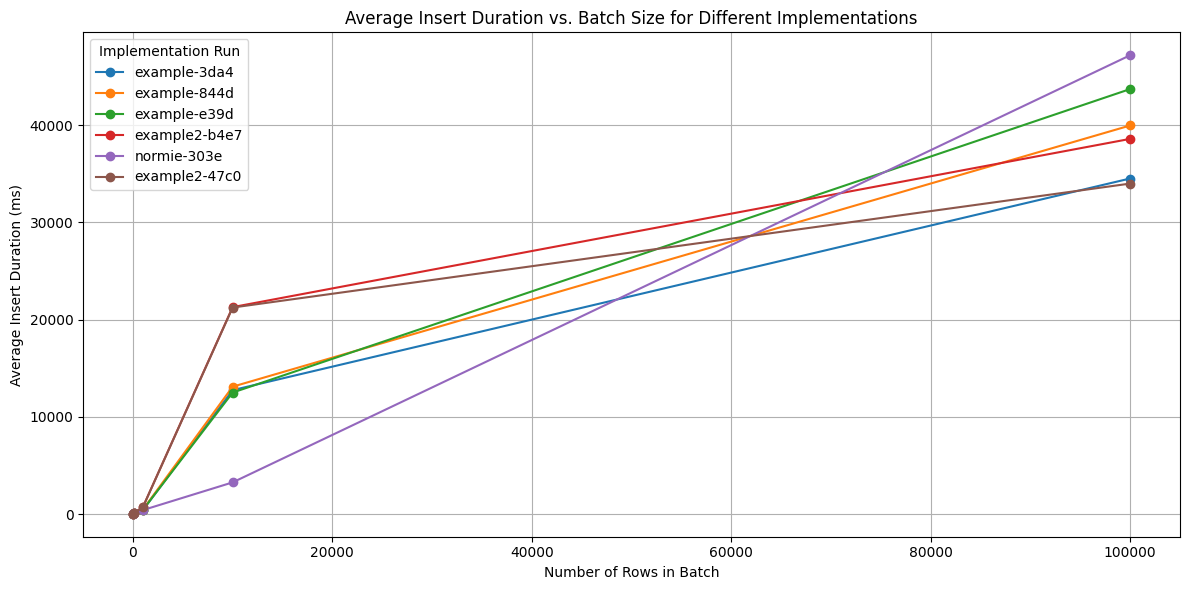

In [42]:
%pip install -q matplotlib
import matplotlib.pyplot as plt  

# Plotting
plt.figure(figsize=(12, 6))

# Iterate over each unique imp_run to plot a separate line
imp_runs = df_avg_insert['imp_run'].unique()
for imp_run in imp_runs:
    subset = df_avg_insert[df_avg_insert['imp_run'] == imp_run]
    plt.plot(subset['batch_size'], subset['avg_insert_duration_ms'], marker='o', linestyle='-', label=imp_run)

# Set labels and title
plt.xlabel('Number of Rows in Batch')
plt.ylabel('Average Insert Duration (ms)')
plt.title('Average Insert Duration vs. Batch Size for Different Implementations')
plt.legend(title='Implementation Run')

# Show grid and plot
plt.grid(True)
plt.tight_layout()
plt.show()

Note: you may need to restart the kernel to use updated packages.
min 0 0.38823529411764707
max 45965 5.0194117647058825
avg 5292.039611


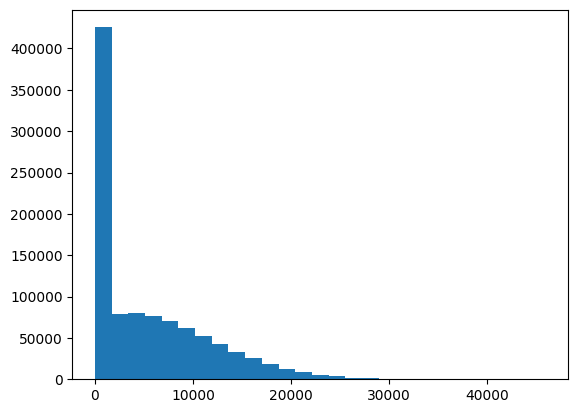

In [8]:
%pip install -q matplotlib

import random  
import matplotlib.pyplot as plt  

def yield_gauss(mu, sigma, min_value, max_value):
    while True:
        num = int(round(random.gauss(mu, sigma),0))
        # yield min value if lower
        # keep trying until num is between min & max value
        if num <= min_value:
            yield min_value
        elif min_value <= num <= max_value:
            yield num

# Parameters
mu = 3300
sigma = 8500
min_value = 0 # 700
max_value = 200000 # 1300

# Generate numbers using the yieldable function
nums = []
gauss_gen = yield_gauss(mu, sigma, min_value, max_value)
for _ in range(1_000_000):
    nums.append(int(next(gauss_gen)))

print("min", min(nums), abs(mu - min(nums)) / sigma)
print("max", max(nums), abs(mu - max(nums)) / sigma)
print("avg", sum(nums) / len(nums))
# Plotting a graph
plt.hist(nums, bins=27)
plt.show()